In [7]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["rand"])
start_index = 1

config = {
    "_experiment_name": "test_al2",
    "_num_repeats": 10,
    "_n_workers": 10,
    "_local": True,
    "_verbose": True,
    "_overwrite": False,
    "_mode": "al",

    "seed": 14,
    "batch_size": [200],
    "noise_level": [0.0, 0.2, 0.4],
    "warm_start": [0.05],
    "acq_fn": ["entropy"],
    "model_name": "MLP",
    "predictor": ["model", "CC"],
    "dynamic_K": [True, False],
    "sim_init": ["t1", "t2"],
    "sim_init_qs": ["t1"],
    "sample_size": 1,
    "test_sample_size": 1,

    "acq_noise": [False],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [1, 3, 20],
    "allow_requery": [True, False],

    "dataset_name": "synthetic",
    "dataset_n_samples": 2000,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": 1,
}

start_index = er.generate_experiments(
    folder="../configs/test_al2",
    options_to_keep=[],
    start_index=start_index, 
    **config
)

In [23]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["train_accuracy", "pool_accuracy"])
data = er.read_all_data(folder="../experiment_results_local/test_al2/")
print(data.shape)
print(data.keys())
config = {

    "seed": 14,
    "batch_size": [200],
    "noise_level": [0.2],
    "warm_start": [0.05],
    "acq_fn": ["entropy"],
    "model_name": "MLP",
    "predictor": ["model", "CC"],
    "dynamic_K": [True, False],
    "sim_init": ["t1", "t2", "t3"],
    "sim_init_qs": ["t1", "t2"],
    "sample_size": 1,
    "test_sample_size": 1,

    "acq_noise": [False, True],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [1, 3, 20],
    "allow_requery": [True, False],

    "dataset_name": "synthetic",
    "dataset_n_samples": 2000,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": 1,
}
data = er.filter_dataframe(data, config).reset_index()
print(data.keys())
print(data.shape)

(1569, 24)
Index(['seed', 'batch_size', 'noise_level', 'warm_start', 'acq_fn',
       'model_name', 'predictor', 'dynamic_K', 'sim_init', 'sim_init_qs',
       'sample_size', 'test_sample_size', 'acq_noise', 'power_beta',
       'use_power', 'mean_field_beta', 'allow_requery', 'dataset_name',
       'dataset_n_samples', 'dataset_n_clusters', 'dataset_class_balance',
       'dataset_class_sep', 'train_accuracy', 'pool_accuracy'],
      dtype='object')
Index(['index', 'seed', 'batch_size', 'noise_level', 'warm_start', 'acq_fn',
       'model_name', 'predictor', 'dynamic_K', 'sim_init', 'sim_init_qs',
       'sample_size', 'test_sample_size', 'acq_noise', 'power_beta',
       'use_power', 'mean_field_beta', 'allow_requery', 'dataset_name',
       'dataset_n_samples', 'dataset_n_clusters', 'dataset_class_balance',
       'dataset_class_sep', 'train_accuracy', 'pool_accuracy'],
      dtype='object')
(188, 25)


c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c

KeyboardInterrupt: 

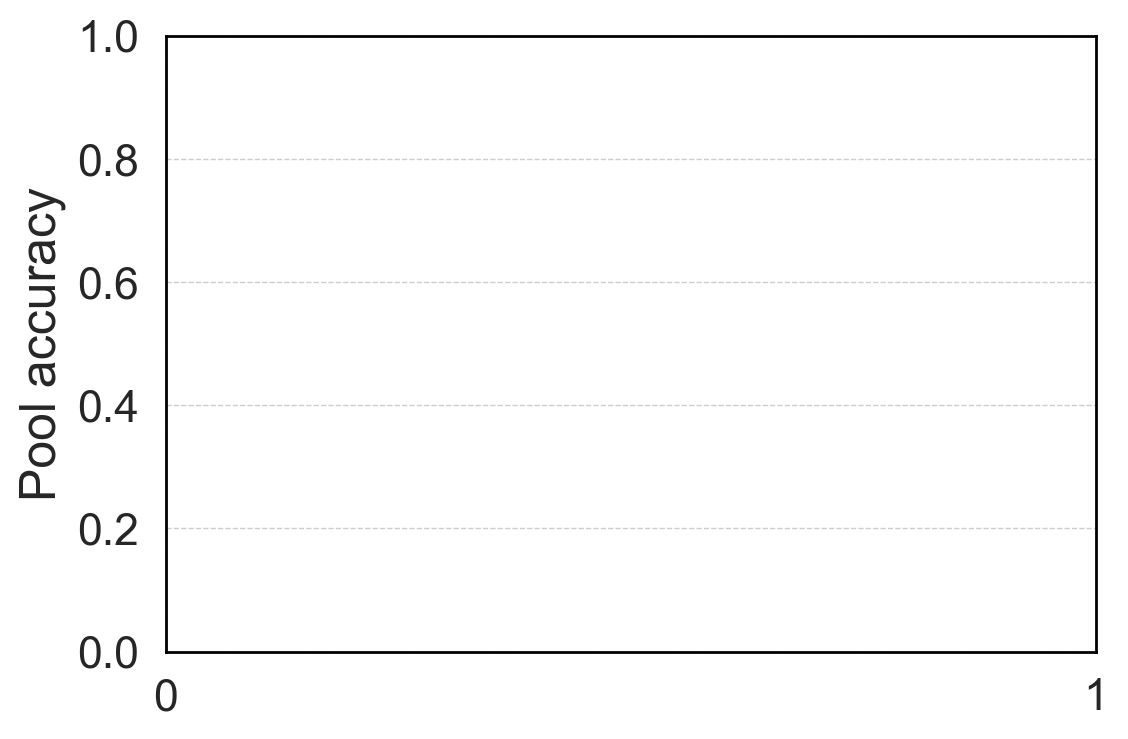

In [24]:

config = {
    "_experiment_name": "test_al2",
    "_num_repeats": 10,
    "_n_workers": 10,
    "_local": True,
    "_verbose": True,
    "_overwrite": False,
    "_mode": "al",

    "seed": 14,
    "batch_size": [200],
    "noise_level": [0.2],
    "warm_start": [0.05],
    "acq_fn": ["cc_entropy"],
    "model_name": "MLP",
    "predictor": ["model", "CC"],
    "dynamic_K": [True, False],
    "sim_init": ["t1", "t2", "t3"],
    "sim_init_qs": ["t1", "t2"],
    "sample_size": 1,
    "test_sample_size": 1,

    "acq_noise": [False, True],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [1, 3, 20],
    "allow_requery": [True, False],

    "dataset_name": "synthetic",
    "dataset_n_samples": 2000,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": 1,
}
er.generate_AL_curves(
    data,
    save_location="../plots/test_al5/",
    categorize=[],
    compare=["predictor"],
    vary=["x"],
    options_in_file_name=["noise_level", "acq_fn", "dynamic_K", "sim_init", "sim_init_qs", "acq_noise", "mean_field_beta", "allow_requery"],
    auc=True,
    summary_method="auc_max_ind",
    indices=[], 
    threshold=1,
    err_style="band",
    marker="o",
    markersize=6,
    capsize=6,
    linestyle="solid",
    prop=True,
    **config
)

In [56]:
n_samples = 3000
n_clusters = 10
class_sep = 0.1
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
X, Y = make_classification(
    n_samples=n_samples,
    n_features=10,
    n_informative=7,
    n_redundant=3,
    n_repeated=0,
    n_classes=n_clusters,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.05,
    class_sep=class_sep,
    hypercube=False,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=13)

In [57]:
from sklearn.metrics import  accuracy_score
model = MLPClassifier(random_state=13, max_iter=500)
model.fit(X, Y)
accuracy_score(Y, model.predict(X))


c:\Users\Linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.872